

---

**1- Symbolic computations**

---



In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = Symbol('x')
f = x**7 - 13*x**6 + 37*x**5 + 125*x**4 - 806*x**3 + 1328*x**2 - 672*x - 10000
fd = diff(f)
fdd = diff(fd)
dRoots = solveset(fd, x)
ddRoots = solveset(fdd, x)

res = list(zip([float(_) for _ in dRoots if fdd.subs(x, _) > 0], [float(f.subs(x, _)) for _ in dRoots if fdd.subs(x, _) > 0]))
x_points = [x[0] for x in res]
y_points = [x[1] for x in res]

max = res[0]
for a in res:
  if a[1] > max[1]:
    max = a

print('All points: ', res)
print('Maxima: ', max)

All points:  [(0.3628552359615001, -10105.124815613532), (2.5361932783876937, -10041.380965207589), (6.294361670928645, -17857.39629223587)]
Maxima:  (2.5361932783876937, -10041.380965207589)


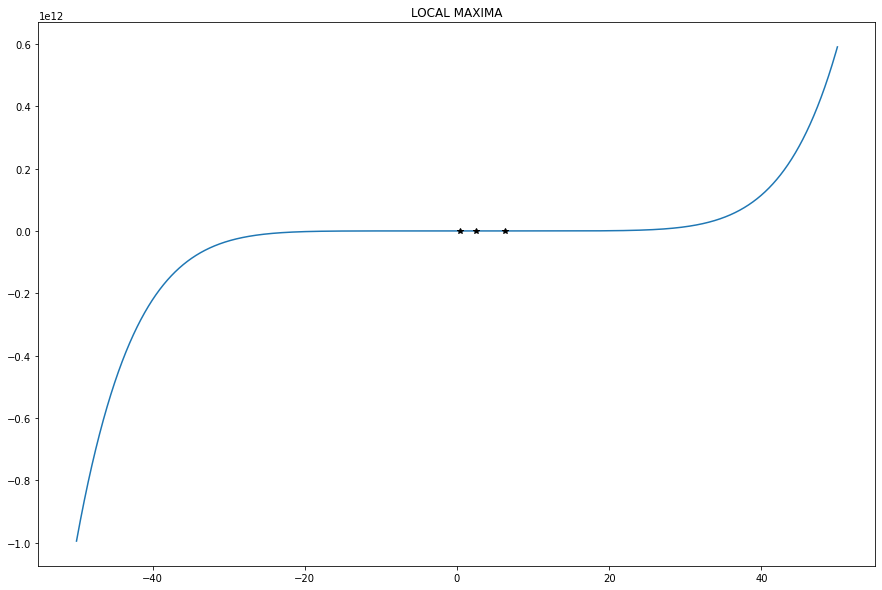

In [ ]:
# PLOTTING MAXIMA

critical_points = list(solveset(fd, x))
critical_points = [a for a in critical_points if fdd.subs(x, a) > 0]
critical_pointsy = [f.subs(x, a) for a in critical_points]

xx = np.linspace(-50, 50, 100000)
yy = lambdify(x, f)(xx)

plt.figure(figsize=(15,10))
plt.title('LOCAL MAXIMA')
plt.plot(xx, np.transpose(yy))
plt.plot(critical_points, critical_pointsy, 'k*')
plt.show()

In [ ]:
vals = list(zip([float(_) for _ in dRoots if fdd.subs(x, _) > 0], [float(f.subs(x, _)) for _ in dRoots if fdd.subs(x, _) > 0]))

In [ ]:
print(vals)

[(0.3628552359615001, -10105.124815613532), (2.5361932783876937, -10041.380965207589), (6.294361670928645, -17857.39629223587)]




---

**2- BOT**

---



In [ ]:
!pip install wolframalpha api

Please enter the equation: 
f’ = cos(x)

Answer:  f(x) = c_1 + sin(x)


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


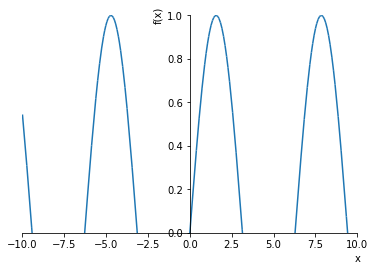

In [ ]:
import re
import wolframalpha
from sympy.parsing.sympy_parser import parse_expr
from sympy.parsing.sympy_parser import standard_transformations,implicit_multiplication_application
from sympy.abc import x
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols

client = wolframalpha.Client('xxx - xxx - xxx')
transformations = (standard_transformations + (implicit_multiplication_application,))

print('Please enter the equation: ')
qs = input()

if re.search('[a-zA-Z]', qs) == None:
  print('\nAnswer: ' , str(parse_expr(qs)))
else:
  if re.search('[’]', qs) != None:
    res = client.query(qs)
    output = next(res.results).text
    print('\nAnswer: ', str(output))
    to_plot = output.split('=')[1]
    to_plot = to_plot.replace('c_1', '0')
    plot(to_plot)
  else:
    x = Symbol('x')
    qs = qs.replace("^", "**")
    eq1, eq2 = qs.split('=')
    eq1 = parse_expr(eq1, evaluate=False, transformations=transformations)
    eq2 = parse_expr(eq2, evaluate=False, transformations=transformations)
    new_eq = eq1 - eq2
    ans = solveset(new_eq, x)
    print('\nAnswer: ', str(ans))
    to_plot = eq1
    plot(to_plot)